In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load your dataset
data = pd.read_csv(r"C:\Users\hp\Downloads\archive (10)\Bank Customer Churn Prediction.csv")

# Display the first few rows
print(data.head())


   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


In [3]:
# Handle missing values
data.fillna(method='ffill', inplace=True)

# Encode categorical variables (example)
data = pd.get_dummies(data, drop_first=True)

# Define features and target variable
X = data.drop('churn', axis=1)  # replace 'churn' with your target variable
y = data['churn']


C:\Users\hp\AppData\Local\Temp\ipykernel_6608\2780916381.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


In [7]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


[[1545   62]
 [ 205  188]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 0.8665


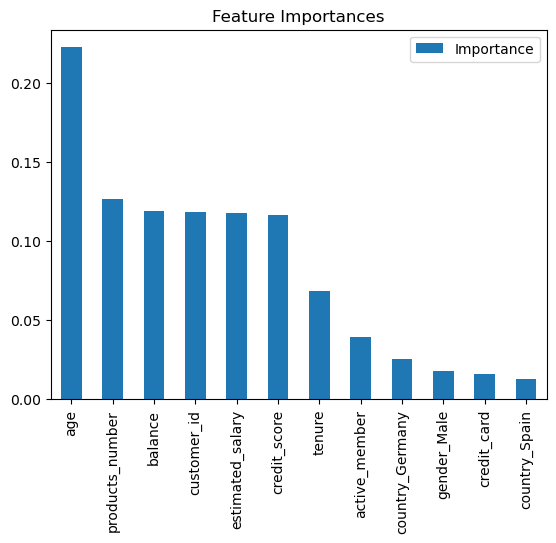

In [8]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)

# Plot
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()


In [9]:
import joblib

joblib.dump(rf_classifier, 'churn_model.pkl')


['churn_model.pkl']